In [1]:
from utils import utils
import numpy as np
from models import models
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
u = utils()
m = models()

In [3]:
x_train, y_train, channels = u.extract_all()
x_test, y_test, channels = u.extract_all(subset="valid")

In [49]:
channels_names=list(channels.keys())

In [4]:
x_train.shape, x_test.shape

((4500, 64, 795), (750, 64, 795))

In [5]:
def check_rythm(rythm, x_train, y_train, x_test, y_test, features = "statistics"):
    x_train = u.get_ryhtm(x_train, rythm)
    x_test = u.get_ryhtm(x_test, rythm)
    
    print("statical features extraction start")
    x_train_temp = np.asarray([u.temporal_features(raw, counter=idx) for idx, raw in enumerate(x_train)])
    x_test_temp = np.asarray([u.temporal_features(raw, counter=idx) for idx, raw in enumerate(x_test)])
    print("statical features extraction complete")
    print("temporal features extraction start")
    x_train_stat = np.asarray([u.statistical_features(raw, counter=idx) for idx, raw in enumerate(x_train)])
    x_test_stat = np.asarray([u.statistical_features(raw, counter=idx) for idx, raw in enumerate(x_test)])
    print("temporal features extraction end")
    print("spectral features extraction start")
    x_train_spect = np.asarray([u.spectral_features(raw, counter=idx) for idx, raw in enumerate(x_train)])
    x_test_spect = np.asarray([u.spectral_features(raw, counter=idx) for idx, raw in enumerate(x_test)])
    print("spectral features extraction end")
    
    return x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect
        

In [14]:
x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect = check_rythm("delta", x_train, y_train, x_test, y_test)

statical features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
statical features extraction complete
temporal features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
temporal features extraction end
spectral features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
spectral features extraction end


In [49]:
def flatten_arr(testlist):
    output = list()
    for i in testlist:
        if isinstance(i, float)==False and isinstance(i, int)==False:
            output.extend(i)
        else:
            output.append(i)
    return output
x_train_spect = np.array([flatten_arr(feat) for feat in x_train_spect])
x_test_spect = np.array([flatten_arr(feat) for feat in -x_test_spect])

In [50]:
x_train_stat_temp = np.hstack((x_train_stat, x_train_temp))
x_test_stat_temp = np.hstack((x_test_stat, x_test_temp))
x_train_stat_spect = np.hstack((x_train_stat, x_train_spect))
x_test_stat_spect = np.hstack((x_test_stat, x_test_spect))
x_train_temp_spect = np.hstack((x_train_temp, x_train_spect))
x_test_temp_spect = np.hstack((x_test_temp, x_test_spect))
x_train_all_features = np.hstack((x_train_stat, x_train_temp, x_train_spect))
x_test_all_features = np.hstack((x_test_stat, x_test_temp, x_test_spect))

In [52]:
ttt = ["x_train_temp", "x_test_temp", "x_train_stat", "x_test_stat", "x_train_spect", "x_test_spect",
       "x_train_stat_temp", "x_test_stat_temp", "x_train_stat_spect", "x_test_stat_spect", "x_train_temp_spect",
       "x_test_temp_spect", "x_train_all_features", "x_test_all_features"]
t = [x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect,x_train_stat_temp, 
     x_test_stat_temp, x_train_stat_spect, x_test_stat_spect, x_train_temp_spect,x_test_temp_spect, 
     x_train_all_features, x_test_all_features]
# for filename, data in zip(ttt, t):
#     filen = filename+".npy"
#     with open(filen, 'wb') as f:
#         np.save(f, data)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

def knnclf(x_train, y_train, x_test, y_test):
    kclf = KNeighborsClassifier(n_neighbors=1)
    kclf.fit(x_train, y_train)
    y_pred = kclf.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n -------------Classification Report-------------\n")
    print(classification_report(y_test, y_pred))

In [71]:
for i in range(0, 14, 2):
    print(ttt[i])
    knnclf(t[i], y_train, t[i+1], y_test)

x_train_temp
Accuracy: 0.26266666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.27      0.26      0.27       150
           1       0.25      0.25      0.25       150
           2       0.27      0.27      0.27       150
           3       0.26      0.27      0.27       150
           4       0.26      0.27      0.26       150

   micro avg       0.26      0.26      0.26       750
   macro avg       0.26      0.26      0.26       750
weighted avg       0.26      0.26      0.26       750
 samples avg       0.26      0.26      0.26       750

x_train_stat
Accuracy: 0.23866666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.24      0.25      0.24       150
           1       0.20      0.19      0.20       150
           2       0.26      0.27      0.26       150
           3       0.23      0.22      0.22       15

# Theta

In [80]:
x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect = check_rythm("theta", x_train, y_train, x_test, y_test)

statical features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
statical features extraction complete
temporal features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
temporal features extraction end
spectral features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
spectral features extraction end


In [81]:
def flatten_arr(testlist):
    output = list()
    for i in testlist:
        if isinstance(i, float)==False and isinstance(i, int)==False:
            output.extend(i)
        else:
            output.append(i)
    return output
x_train_spect = np.array([flatten_arr(feat) for feat in x_train_spect])
x_test_spect = np.array([flatten_arr(feat) for feat in x_test_spect])

In [82]:
x_train_stat_temp = np.hstack((x_train_stat, x_train_temp))
x_test_stat_temp = np.hstack((x_test_stat, x_test_temp))
x_train_stat_spect = np.hstack((x_train_stat, x_train_spect))
x_test_stat_spect = np.hstack((x_test_stat, x_test_spect))
x_train_temp_spect = np.hstack((x_train_temp, x_train_spect))
x_test_temp_spect = np.hstack((x_test_temp, x_test_spect))
x_train_all_features = np.hstack((x_train_stat, x_train_temp, x_train_spect))
x_test_all_features = np.hstack((x_test_stat, x_test_temp, x_test_spect))

In [83]:
ttt = ["x_train_temp", "x_test_temp", "x_train_stat", "x_test_stat", "x_train_spect", "x_test_spect",
       "x_train_stat_temp", "x_test_stat_temp", "x_train_stat_spect", "x_test_stat_spect", "x_train_temp_spect",
       "x_test_temp_spect", "x_train_all_features", "x_test_all_features"]
t = [x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect,x_train_stat_temp, 
     x_test_stat_temp, x_train_stat_spect, x_test_stat_spect, x_train_temp_spect,x_test_temp_spect, 
     x_train_all_features, x_test_all_features]

In [84]:
for i in range(0, 14, 2):
    print(ttt[i])
    knnclf(t[i], y_train, t[i+1], y_test)

x_train_temp
Accuracy: 0.30666666666666664

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.32      0.31      0.31       150
           1       0.35      0.30      0.32       150
           2       0.30      0.32      0.31       150
           3       0.28      0.29      0.28       150
           4       0.30      0.32      0.31       150

   micro avg       0.31      0.31      0.31       750
   macro avg       0.31      0.31      0.31       750
weighted avg       0.31      0.31      0.31       750
 samples avg       0.31      0.31      0.31       750

x_train_stat
Accuracy: 0.32266666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.31      0.30      0.31       150
           1       0.35      0.35      0.35       150
           2       0.34      0.33      0.33       150
           3       0.32      0.31      0.32       15

# Alpha

In [85]:
x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect = check_rythm("alpha", x_train, y_train, x_test, y_test)
def flatten_arr(testlist):
    output = list()
    for i in testlist:
        if isinstance(i, float)==False and isinstance(i, int)==False:
            output.extend(i)
        else:
            output.append(i)
    return output
x_train_spect = np.array([flatten_arr(feat) for feat in x_train_spect])
x_test_spect = np.array([flatten_arr(feat) for feat in x_test_spect])

statical features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
statical features extraction complete
temporal features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
temporal features extraction end
spectral features extraction start
Trail  0


C:\Users\97450\OneDrive - Hamad bin Khalifa University\Desktop\Project\Master_thesis_project\OSF dataset\Speech Decoding From EEG signals\utils.py:135: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(output)


Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
spectral features extraction end


In [86]:
x_train_stat_temp = np.hstack((x_train_stat, x_train_temp))
x_test_stat_temp = np.hstack((x_test_stat, x_test_temp))
x_train_stat_spect = np.hstack((x_train_stat, x_train_spect))
x_test_stat_spect = np.hstack((x_test_stat, x_test_spect))
x_train_temp_spect = np.hstack((x_train_temp, x_train_spect))
x_test_temp_spect = np.hstack((x_test_temp, x_test_spect))
x_train_all_features = np.hstack((x_train_stat, x_train_temp, x_train_spect))
x_test_all_features = np.hstack((x_test_stat, x_test_temp, x_test_spect))
ttt = ["x_train_temp", "x_test_temp", "x_train_stat", "x_test_stat", "x_train_spect", "x_test_spect",
       "x_train_stat_temp", "x_test_stat_temp", "x_train_stat_spect", "x_test_stat_spect", "x_train_temp_spect",
       "x_test_temp_spect", "x_train_all_features", "x_test_all_features"]
t = [x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect,x_train_stat_temp, 
     x_test_stat_temp, x_train_stat_spect, x_test_stat_spect, x_train_temp_spect,x_test_temp_spect, 
     x_train_all_features, x_test_all_features]
for i in range(0, 14, 2):
    print(ttt[i])
    knnclf(t[i], y_train, t[i+1], y_test)

x_train_temp
Accuracy: 0.24666666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.22      0.20      0.21       150
           1       0.28      0.23      0.25       150
           2       0.26      0.29      0.28       150
           3       0.26      0.28      0.27       150
           4       0.22      0.23      0.22       150

   micro avg       0.25      0.25      0.25       750
   macro avg       0.25      0.25      0.25       750
weighted avg       0.25      0.25      0.25       750
 samples avg       0.25      0.25      0.25       750

x_train_stat
Accuracy: 0.268

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.26      0.25      0.26       150
           1       0.23      0.20      0.22       150
           2       0.28      0.29      0.28       150
           3       0.29      0.32      0.31       150
           4

# Beta

In [87]:
x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect = check_rythm("beta", x_train, y_train, x_test, y_test)
def flatten_arr(testlist):
    output = list()
    for i in testlist:
        if isinstance(i, float)==False and isinstance(i, int)==False:
            output.extend(i)
        else:
            output.append(i)
    return output
x_train_spect = np.array([flatten_arr(feat) for feat in x_train_spect])
x_test_spect = np.array([flatten_arr(feat) for feat in x_test_spect])

statical features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
statical features extraction complete
temporal features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
temporal features extraction end
spectral features extraction start
Trail  0


C:\Users\97450\OneDrive - Hamad bin Khalifa University\Desktop\Project\Master_thesis_project\OSF dataset\Speech Decoding From EEG signals\utils.py:135: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(output)


Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
spectral features extraction end


In [88]:
x_train_stat_temp = np.hstack((x_train_stat, x_train_temp))
x_test_stat_temp = np.hstack((x_test_stat, x_test_temp))
x_train_stat_spect = np.hstack((x_train_stat, x_train_spect))
x_test_stat_spect = np.hstack((x_test_stat, x_test_spect))
x_train_temp_spect = np.hstack((x_train_temp, x_train_spect))
x_test_temp_spect = np.hstack((x_test_temp, x_test_spect))
x_train_all_features = np.hstack((x_train_stat, x_train_temp, x_train_spect))
x_test_all_features = np.hstack((x_test_stat, x_test_temp, x_test_spect))
ttt = ["x_train_temp", "x_test_temp", "x_train_stat", "x_test_stat", "x_train_spect", "x_test_spect",
       "x_train_stat_temp", "x_test_stat_temp", "x_train_stat_spect", "x_test_stat_spect", "x_train_temp_spect",
       "x_test_temp_spect", "x_train_all_features", "x_test_all_features"]
t = [x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect,x_train_stat_temp, 
     x_test_stat_temp, x_train_stat_spect, x_test_stat_spect, x_train_temp_spect,x_test_temp_spect, 
     x_train_all_features, x_test_all_features]
for i in range(0, 14, 2):
    print(ttt[i])
    knnclf(t[i], y_train, t[i+1], y_test)

x_train_temp
Accuracy: 0.3933333333333333

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       150
           1       0.39      0.39      0.39       150
           2       0.41      0.40      0.40       150
           3       0.39      0.36      0.37       150
           4       0.43      0.46      0.45       150

   micro avg       0.39      0.39      0.39       750
   macro avg       0.39      0.39      0.39       750
weighted avg       0.39      0.39      0.39       750
 samples avg       0.39      0.39      0.39       750

x_train_stat
Accuracy: 0.384

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.41      0.39      0.40       150
           1       0.37      0.35      0.36       150
           2       0.40      0.41      0.41       150
           3       0.38      0.39      0.39       150
           4 

# Gamma

In [89]:
x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect = check_rythm("gamma", x_train, y_train, x_test, y_test)
def flatten_arr(testlist):
    output = list()
    for i in testlist:
        if isinstance(i, float)==False and isinstance(i, int)==False:
            output.extend(i)
        else:
            output.append(i)
    return output
x_train_spect = np.array([flatten_arr(feat) for feat in x_train_spect])
x_test_spect = np.array([flatten_arr(feat) for feat in x_test_spect])

statical features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
statical features extraction complete
temporal features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
temporal features extraction end
spectral features extraction start
Trail  0


C:\Users\97450\OneDrive - Hamad bin Khalifa University\Desktop\Project\Master_thesis_project\OSF dataset\Speech Decoding From EEG signals\utils.py:135: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(output)


Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
spectral features extraction end


In [90]:
x_train_stat_temp = np.hstack((x_train_stat, x_train_temp))
x_test_stat_temp = np.hstack((x_test_stat, x_test_temp))
x_train_stat_spect = np.hstack((x_train_stat, x_train_spect))
x_test_stat_spect = np.hstack((x_test_stat, x_test_spect))
x_train_temp_spect = np.hstack((x_train_temp, x_train_spect))
x_test_temp_spect = np.hstack((x_test_temp, x_test_spect))
x_train_all_features = np.hstack((x_train_stat, x_train_temp, x_train_spect))
x_test_all_features = np.hstack((x_test_stat, x_test_temp, x_test_spect))
ttt = ["x_train_temp", "x_test_temp", "x_train_stat", "x_test_stat", "x_train_spect", "x_test_spect",
       "x_train_stat_temp", "x_test_stat_temp", "x_train_stat_spect", "x_test_stat_spect", "x_train_temp_spect",
       "x_test_temp_spect", "x_train_all_features", "x_test_all_features"]
t = [x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect,x_train_stat_temp, 
     x_test_stat_temp, x_train_stat_spect, x_test_stat_spect, x_train_temp_spect,x_test_temp_spect, 
     x_train_all_features, x_test_all_features]
for i in range(0, 14, 2):
    print(ttt[i])
    knnclf(t[i], y_train, t[i+1], y_test)

x_train_temp
Accuracy: 0.712

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       150
           1       0.66      0.69      0.68       150
           2       0.77      0.72      0.74       150
           3       0.70      0.77      0.73       150
           4       0.76      0.71      0.74       150

   micro avg       0.71      0.71      0.71       750
   macro avg       0.71      0.71      0.71       750
weighted avg       0.71      0.71      0.71       750
 samples avg       0.71      0.71      0.71       750

x_train_stat
Accuracy: 0.5533333333333333

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       150
           1       0.50      0.53      0.51       150
           2       0.59      0.52      0.55       150
           3       0.52      0.52      0.52       150
           4 

In [6]:
x_train_temp, x_test_temp, x_train_stat, x_test_stat, x_train_spect, x_test_spect = check_rythm("gamma", x_train, y_train, x_test, y_test)
def flatten_arr(testlist):
    output = list()
    for i in testlist:
        if isinstance(i, float)==False and isinstance(i, int)==False:
            output.extend(i)
        else:
            output.append(i)
    return output
x_train_spect = np.array([flatten_arr(feat) for feat in x_train_spect])
x_test_spect = np.array([flatten_arr(feat) for feat in x_test_spect])

statical features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
statical features extraction complete
temporal features extraction start
Trail  0
Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
temporal features extraction end
spectral features extraction start
Trail  0


C:\Users\97450\OneDrive - Hamad bin Khalifa University\Desktop\Project\Master_thesis_project\OSF dataset\Speech Decoding From EEG signals\utils.py:135: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(output)


Trail  1000
Trail  2000
Trail  3000
Trail  4000
Trail  0
spectral features extraction end


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
def model(x_train, y_train, x_test, y_test):
    kclf = KNeighborsClassifier(n_neighbors=1)
    kclf.fit(x_train, y_train)
    y_pred = kclf.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [50]:
def channel_selection(train, ytrain, test, ytest):
    channel = []
    acccc = []
    tempfeatures, vtemp = train, test
    total_feature = train.shape[1]
    feature_per_channel = total_feature//64
    for i in range(0, total_feature, feature_per_channel):
        acc = model(tempfeatures[:,i:i+feature_per_channel], ytrain, vtemp[:,i:i+feature_per_channel], ytest)
        if i!=0:
            channel.append(i//feature_per_channel)
        else: 
            channel.append(i)
        acccc.append(acc)
    channel__ = [ch for ch, a in zip(channel, acccc) if a>=np.mean(acccc)]
    ch_names = [channels_names[i] for i in channel__]
    print(f"Top channel : {len(channel__)} \n {ch_names}")
    
#     tempfeatures, vtemp = train, test
    temp, vtem = [], []
    for ch1 in tempfeatures:
        newtemp = []
        for i in range(0, total_feature, feature_per_channel):
            if i!=0:
                if i//feature_per_channel in channel__:
                    newtemp.extend(ch1[i:i+feature_per_channel])
        temp.append(newtemp)

    for ch2 in vtemp:
        newvtem = []
        for i in range(0, total_feature, feature_per_channel):
            if i!=0:
                if i//feature_per_channel in channel__:
                    newvtem.extend(ch2[i:i+feature_per_channel])
        vtem.append(newvtem)
    temp, vtem = np.asarray(temp), np.asarray(vtem)
    knnclf(temp, ytrain, vtem, ytest)

# Temporal Features

In [51]:
channel_selection(x_train_temp, y_train,  x_test_temp, y_test)

Top channel : 31 
 ['F7', 'F4', 'FC5', 'FC1', 'FC2', 'T7', 'C3', 'T8', 'TP9', 'CP1', 'CP2', 'P7', 'Pz', 'PO9', 'Oz', 'PO10', 'AF3', 'AF4', 'AF8', 'F1', 'F2', 'F6', 'FC3', 'FC4', 'C2', 'C6', 'CP3', 'CP4', 'TP8', 'PO7', 'PO4']
Accuracy: 0.7186666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       150
           1       0.70      0.70      0.70       150
           2       0.78      0.79      0.78       150
           3       0.70      0.73      0.71       150
           4       0.71      0.68      0.70       150

   micro avg       0.72      0.72      0.72       750
   macro avg       0.72      0.72      0.72       750
weighted avg       0.72      0.72      0.72       750
 samples avg       0.72      0.72      0.72       750



# Statistical Features

In [52]:
channel_selection(x_train_stat, y_train,  x_test_stat, y_test)

Top channel : 29 
 ['Fp1', 'Fp2', 'F3', 'F8', 'FC5', 'C4', 'T8', 'TP9', 'CP6', 'TP10', 'P7', 'P8', 'PO9', 'Oz', 'AF4', 'F1', 'F6', 'FT7', 'FC4', 'FT10', 'C5', 'C2', 'C6', 'TP7', 'CP4', 'TP8', 'P5', 'P6', 'PO8']
Accuracy: 0.536

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       150
           1       0.49      0.53      0.51       150
           2       0.55      0.51      0.53       150
           3       0.51      0.49      0.50       150
           4       0.61      0.57      0.59       150

   micro avg       0.54      0.54      0.54       750
   macro avg       0.54      0.54      0.54       750
weighted avg       0.54      0.54      0.54       750
 samples avg       0.54      0.54      0.54       750



# Spectrals features

In [62]:
channel_selection(x_train_spect, y_train,  x_test_spect, y_test)

Top channel : 31 
 ['Fp2', 'F7', 'Fz', 'F4', 'FC6', 'T7', 'C4', 'T8', 'TP9', 'CP5', 'P7', 'P3', 'Pz', 'PO9', 'Oz', 'O2', 'PO10', 'AF7', 'F1', 'F2', 'F6', 'FT9', 'FC4', 'FT8', 'FT10', 'C5', 'C2', 'C6', 'P1', 'P2', 'PO7']
Accuracy: 0.396

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.43      0.43      0.43       150
           1       0.37      0.44      0.40       150
           2       0.39      0.37      0.38       150
           3       0.39      0.39      0.39       150
           4       0.40      0.35      0.37       150

   micro avg       0.40      0.40      0.40       750
   macro avg       0.40      0.40      0.40       750
weighted avg       0.40      0.40      0.40       750
 samples avg       0.40      0.40      0.40       750



In [54]:
x_train_stat_temp = np.hstack((x_train_stat, x_train_temp))
x_test_stat_temp = np.hstack((x_test_stat, x_test_temp))
x_train_stat_spect = np.hstack((x_train_stat, x_train_spect))
x_test_stat_spect = np.hstack((x_test_stat, x_test_spect))
x_train_temp_spect = np.hstack((x_train_temp, x_train_spect))
x_test_temp_spect = np.hstack((x_test_temp, x_test_spect))
x_train_all_features = np.hstack((x_train_stat, x_train_temp, x_train_spect))
x_test_all_features = np.hstack((x_test_stat, x_test_temp, x_test_spect))

# stat_temp features

In [55]:
channel_selection(x_train_stat_temp, y_train,  x_test_stat_temp, y_test)

Top channel : 16 
 ['C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']
Accuracy: 0.7186666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       150
           1       0.66      0.71      0.68       150
           2       0.79      0.73      0.76       150
           3       0.71      0.78      0.74       150
           4       0.75      0.70      0.72       150

   micro avg       0.72      0.72      0.72       750
   macro avg       0.72      0.72      0.72       750
weighted avg       0.72      0.72      0.72       750
 samples avg       0.72      0.72      0.72       750



# stat_spect features

In [56]:
channel_selection(x_train_stat_spect, y_train,  x_test_stat_spect, y_test)

Top channel : 11 
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC1', 'P8', 'AF4', 'TP7']
Accuracy: 0.24

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.24      0.27      0.25       150
           1       0.25      0.24      0.24       150
           2       0.25      0.26      0.26       150
           3       0.20      0.18      0.19       150
           4       0.25      0.25      0.25       150

   micro avg       0.24      0.24      0.24       750
   macro avg       0.24      0.24      0.24       750
weighted avg       0.24      0.24      0.24       750
 samples avg       0.24      0.24      0.24       750



# Temp_spect feature

In [57]:
channel_selection(x_train_temp_spect, y_train,  x_test_temp_spect, y_test)

Top channel : 8 
 ['Fp1', 'Fp2', 'F3', 'CP5', 'P3', 'PO10', 'AF7', 'C6']
Accuracy: 0.28

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.33      0.37      0.35       150
           1       0.30      0.25      0.27       150
           2       0.27      0.27      0.27       150
           3       0.23      0.23      0.23       150
           4       0.27      0.27      0.27       150

   micro avg       0.28      0.28      0.28       750
   macro avg       0.28      0.28      0.28       750
weighted avg       0.28      0.28      0.28       750
 samples avg       0.28      0.28      0.28       750



# All spect, temp and stat feature

In [59]:
channel_selection(x_train_all_features, y_train,  x_test_all_features, y_test)

Top channel : 10 
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'AF8']
Accuracy: 0.23466666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.23      0.23      0.23       150
           1       0.31      0.30      0.31       150
           2       0.21      0.19      0.20       150
           3       0.20      0.23      0.21       150
           4       0.23      0.23      0.23       150

   micro avg       0.23      0.23      0.23       750
   macro avg       0.24      0.23      0.23       750
weighted avg       0.24      0.23      0.23       750
 samples avg       0.23      0.23      0.23       750



In [77]:
 def forward(train, ytrain, test, ytest):
    total_feature = train.shape[1]
    feature_per_channel = total_feature//64
    channel = [0]
    tempfeatures, vtemp = train[:,0:feature_per_channel], test[:, 0:feature_per_channel]
    for i in range(0, total_feature, feature_per_channel):
        if i==0:
            cuacc = model(tempfeatures, ytrain, vtemp, ytest)
            preacc = cuacc
        else:
            temppp = [np.concatenate((tempf, fff), axis=None) for tempf, fff in zip(tempfeatures, train[:,i:i+feature_per_channel])]
            vtemppp = [np.concatenate((tempf, fff), axis=None) for tempf, fff in zip(vtemp, test[:,i:i+feature_per_channel])]
            cuacc = model(temppp, ytrain, vtemppp, ytest)
#             print('current accuracy: '+str(cuacc))
            if cuacc>preacc:
                preacc = cuacc
                tempfeatures = temppp
                vtemp = vtemppp
                channel.append(i//feature_per_channel)
#                 print('previous accuracy: '+str(preacc))
                #print('added '+str(channel_names[i//feature_per_channel]))
    ch_names = [channels_names[i] for i in channel]
    print(f"Top channel : {len(channel)} \n {ch_names}")
    knnclf(tempfeatures, ytrain, vtemp, ytest)

# Temporal Features

In [78]:
forward(x_train_temp, y_train,  x_test_temp, y_test)

Top channel : 38 
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP6', 'TP10', 'P7', 'PO9', 'O1', 'AF4', 'AF8', 'F1', 'FT9', 'FC4', 'FT8', 'FT10', 'C6', 'CP3', 'CPz', 'CP4', 'P6', 'PO7', 'PO3']
Accuracy: 0.7386666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.67      0.71      0.69       150
           2       0.78      0.77      0.77       150
           3       0.73      0.77      0.75       150
           4       0.77      0.70      0.73       150

   micro avg       0.74      0.74      0.74       750
   macro avg       0.74      0.74      0.74       750
weighted avg       0.74      0.74      0.74       750
 samples avg       0.74      0.74      0.74       750



# Statistical Features

In [79]:
forward(x_train_stat, y_train,  x_test_stat, y_test)

Top channel : 29 
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'FC5', 'FC1', 'FC2', 'C3', 'C4', 'T8', 'TP9', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'Oz', 'PO10', 'AF3', 'AF4', 'F1', 'F2', 'FT7', 'FC3', 'FC4', 'C2', 'P5']
Accuracy: 0.544

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       150
           1       0.50      0.53      0.51       150
           2       0.63      0.50      0.56       150
           3       0.52      0.56      0.54       150
           4       0.58      0.59      0.59       150

   micro avg       0.54      0.54      0.54       750
   macro avg       0.55      0.54      0.54       750
weighted avg       0.55      0.54      0.54       750
 samples avg       0.54      0.54      0.54       750



# Spectrals features

In [80]:
forward(x_train_spect, y_train,  x_test_spect, y_test)

Top channel : 24 
 ['Fp1', 'Fp2', 'FC5', 'C3', 'Cz', 'TP9', 'Pz', 'O1', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F2', 'FT9', 'FT7', 'FC3', 'FT8', 'FT10', 'CP4', 'TP8', 'P5', 'P1', 'PO8']
Accuracy: 0.39866666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.44      0.47      0.45       150
           1       0.34      0.35      0.34       150
           2       0.38      0.35      0.36       150
           3       0.42      0.42      0.42       150
           4       0.42      0.41      0.42       150

   micro avg       0.40      0.40      0.40       750
   macro avg       0.40      0.40      0.40       750
weighted avg       0.40      0.40      0.40       750
 samples avg       0.40      0.40      0.40       750



# stat_temp features

In [81]:
forward(x_train_stat_temp, y_train,  x_test_stat_temp, y_test)

Top channel : 23 
 ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'T7', 'C3', 'Cz', 'T8', 'TP9', 'CP1', 'CP6', 'P3', 'P4', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10']
Accuracy: 0.5653333333333334

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       150
           1       0.54      0.51      0.52       150
           2       0.63      0.56      0.59       150
           3       0.51      0.55      0.53       150
           4       0.61      0.60      0.60       150

   micro avg       0.57      0.57      0.57       750
   macro avg       0.57      0.57      0.57       750
weighted avg       0.57      0.57      0.57       750
 samples avg       0.57      0.57      0.57       750



# stat_spect features

In [82]:
forward(x_train_stat_spect, y_train,  x_test_stat_spect, y_test)

Top channel : 7 
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8']
Accuracy: 0.556

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       150
           1       0.51      0.53      0.52       150
           2       0.61      0.53      0.57       150
           3       0.52      0.52      0.52       150
           4       0.61      0.61      0.61       150

   micro avg       0.56      0.56      0.56       750
   macro avg       0.56      0.56      0.56       750
weighted avg       0.56      0.56      0.56       750
 samples avg       0.56      0.56      0.56       750



# Temp_spect feature

In [83]:
forward(x_train_temp_spect, y_train,  x_test_temp_spect, y_test)

Top channel : 2 
 ['Fp1', 'Fp2']
Accuracy: 0.7

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       150
           1       0.66      0.70      0.68       150
           2       0.76      0.72      0.74       150
           3       0.69      0.73      0.71       150
           4       0.72      0.67      0.69       150

   micro avg       0.70      0.70      0.70       750
   macro avg       0.70      0.70      0.70       750
weighted avg       0.70      0.70      0.70       750
 samples avg       0.70      0.70      0.70       750



# All spect, temp and stat feature

In [84]:
forward(x_train_all_features, y_train,  x_test_all_features, y_test)

Top channel : 9 
 ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1']
Accuracy: 0.7106666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       150
           1       0.67      0.69      0.68       150
           2       0.76      0.73      0.75       150
           3       0.70      0.76      0.73       150
           4       0.74      0.69      0.71       150

   micro avg       0.71      0.71      0.71       750
   macro avg       0.71      0.71      0.71       750
weighted avg       0.71      0.71      0.71       750
 samples avg       0.71      0.71      0.71       750



In [98]:
def backward(train, ytrain, test, ytest):
    total_feature = train.shape[1]
    feature_per_channel = total_feature//64
    channel = []
    tempfeatures, vtemp = train, test
    feature_size = total_feature - feature_per_channel
    prev_acc = model(tempfeatures, ytrain, vtemp, ytest)
    while feature_size>0:
        aaa = [feature_size+i for i in range(feature_per_channel)]
        temppp = np.delete(tempfeatures, aaa, axis=1)
        vtemppp = np.delete(vtemp, aaa, axis=1)
        cuacc = model(temppp, ytrain, vtemppp, ytest)
#         print('current accuracy: '+str(cuacc))
        if cuacc>=prev_acc:
            tempfeatures = temppp
            vtemp = vtemppp
            channel.append(feature_size//feature_per_channel)
#             print('previous accuracy: '+str(prev_acc))
            prev_acc = cuacc
            feature_size -=feature_per_channel
        else:
            feature_size -=feature_per_channel
    ch_names = [channels_names[i] for i in channel]
    print(f"Top channel : {len(channel)} \n {ch_names}")
    knnclf(tempfeatures, ytrain, vtemp, ytest)
    return tempfeatures, vtemp

# Temporal Features

In [90]:
backward(x_train_temp, y_train,  x_test_temp, y_test)

Top channel : 19 
 ['PO8', 'P6', 'P1', 'TP8', 'CP4', 'C6', 'C2', 'C1', 'FT7', 'F6', 'F5', 'AF3', 'AF7', 'O2', 'P8', 'Pz', 'P3', 'P7', 'F3']
Accuracy: 0.752

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.70      0.72      0.71       150
           2       0.80      0.78      0.79       150
           3       0.74      0.77      0.76       150
           4       0.78      0.72      0.75       150

   micro avg       0.75      0.75      0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750
 samples avg       0.75      0.75      0.75       750



# Statistical 

In [91]:
backward(x_train_stat, y_train,  x_test_stat, y_test)

Top channel : 16 
 ['PO8', 'POz', 'PO3', 'P6', 'P5', 'FT7', 'F6', 'F5', 'AF8', 'AF3', 'O2', 'P8', 'TP10', 'CP5', 'F8', 'F3']
Accuracy: 0.616

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       150
           1       0.58      0.58      0.58       150
           2       0.65      0.64      0.64       150
           3       0.58      0.56      0.57       150
           4       0.65      0.65      0.65       150

   micro avg       0.62      0.62      0.62       750
   macro avg       0.62      0.62      0.62       750
weighted avg       0.62      0.62      0.62       750
 samples avg       0.62      0.62      0.62       750



# Spectral

In [92]:
backward(x_train_spect, y_train,  x_test_spect, y_test)

Top channel : 11 
 ['PO8', 'PO4', 'P6', 'P2', 'P5', 'TP8', 'TP7', 'FT10', 'F2', 'Pz', 'P3']
Accuracy: 0.4493333333333333

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       150
           1       0.43      0.45      0.44       150
           2       0.47      0.45      0.46       150
           3       0.41      0.44      0.43       150
           4       0.46      0.45      0.45       150

   micro avg       0.45      0.45      0.45       750
   macro avg       0.45      0.45      0.45       750
weighted avg       0.45      0.45      0.45       750
 samples avg       0.45      0.45      0.45       750



# stat_spect features

In [93]:
backward(x_train_stat_spect, y_train,  x_test_stat_spect, y_test)

Top channel : 19 
 ['PO8', 'PO4', 'P6', 'P2', 'P5', 'TP8', 'C6', 'FC4', 'O1', 'PO9', 'Pz', 'CP2', 'T8', 'F8', 'F4', 'Fz', 'F3', 'F7', 'Fp2']
Accuracy: 0.44666666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       150
           1       0.45      0.45      0.45       150
           2       0.44      0.42      0.43       150
           3       0.41      0.43      0.42       150
           4       0.48      0.45      0.46       150

   micro avg       0.45      0.45      0.45       750
   macro avg       0.45      0.45      0.45       750
weighted avg       0.45      0.45      0.45       750
 samples avg       0.45      0.45      0.45       750



# Temp_spect feature

In [94]:
backward(x_train_temp_spect, y_train,  x_test_temp_spect, y_test)

Top channel : 11 
 ['PO8', 'PO4', 'PO3', 'P6', 'P2', 'P5', 'TP8', 'TP7', 'P8', 'Pz', 'TP9']
Accuracy: 0.452

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      0.48      0.48       150
           1       0.44      0.47      0.45       150
           2       0.46      0.44      0.45       150
           3       0.42      0.42      0.42       150
           4       0.46      0.45      0.46       150

   micro avg       0.45      0.45      0.45       750
   macro avg       0.45      0.45      0.45       750
weighted avg       0.45      0.45      0.45       750
 samples avg       0.45      0.45      0.45       750



# Stat_Temp feature

In [95]:
backward(x_train_stat_temp, y_train,  x_test_stat_temp, y_test)

Top channel : 47 
 ['PO8', 'P6', 'P5', 'C1', 'C5', 'FT10', 'FT8', 'FC4', 'FC3', 'FT7', 'FT9', 'F6', 'F2', 'F1', 'F5', 'AF8', 'AF3', 'AF7', 'PO10', 'O2', 'Oz', 'O1', 'P8', 'P4', 'Pz', 'P3', 'P7', 'TP10', 'CP2', 'CP1', 'CP5', 'TP9', 'T8', 'C4', 'Cz', 'C3', 'T7', 'FC6', 'FC2', 'FC1', 'FC5', 'F8', 'F4', 'Fz', 'F3', 'F7', 'Fp2']
Accuracy: 0.7293333333333333

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       150
           1       0.66      0.71      0.68       150
           2       0.80      0.75      0.77       150
           3       0.72      0.78      0.75       150
           4       0.75      0.67      0.71       150

   micro avg       0.73      0.73      0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750
 samples avg       0.73      0.73      0.73       750



# All Spect,temp, stat feature

In [96]:
backward(x_train_all_features, y_train,  x_test_all_features, y_test)

Top channel : 19 
 ['PO8', 'PO4', 'PO3', 'P6', 'P1', 'P5', 'CPz', 'TP7', 'O2', 'Oz', 'TP10', 'FC1', 'FC5', 'F8', 'F4', 'Fz', 'F3', 'F7', 'Fp2']
Accuracy: 0.45466666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       150
           1       0.44      0.46      0.45       150
           2       0.46      0.45      0.45       150
           3       0.43      0.43      0.43       150
           4       0.47      0.47      0.47       150

   micro avg       0.45      0.45      0.45       750
   macro avg       0.46      0.45      0.45       750
weighted avg       0.46      0.45      0.45       750
 samples avg       0.45      0.45      0.45       750



In [97]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [99]:
teamp_train, temp_test = backward(x_train_temp, y_train,  x_test_temp, y_test)

Top channel : 19 
 ['PO8', 'P6', 'P1', 'TP8', 'CP4', 'C6', 'C2', 'C1', 'FT7', 'F6', 'F5', 'AF3', 'AF7', 'O2', 'P8', 'Pz', 'P3', 'P7', 'F3']
Accuracy: 0.752

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.70      0.72      0.71       150
           2       0.80      0.78      0.79       150
           3       0.74      0.77      0.76       150
           4       0.78      0.72      0.75       150

   micro avg       0.75      0.75      0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750
 samples avg       0.75      0.75      0.75       750



In [100]:
pcatempfeatures = teamp_train.tolist()
pcatemp = temp_test.tolist()

In [120]:
data = pcatempfeatures
data.extend(pcatemp)

kpca = KernelPCA(n_components=60)
kpca.fit(data)

X = kpca.transform(teamp_train)

vX = kpca.transform(temp_test)

In [130]:
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(X, y_train)
y_pred = kclf.predict(vX)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix([np.argmax(a) for a in y_test], [np.argmax(j) for j in y_pred]))  

Accuracy: 0.7506666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.70      0.72      0.71       150
           2       0.80      0.78      0.79       150
           3       0.73      0.77      0.75       150
           4       0.78      0.71      0.74       150

   micro avg       0.75      0.75      0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750
 samples avg       0.75      0.75      0.75       750

[[115  10   5  14   6]
 [ 17 108  11   5   9]
 [  5  11 117  12   5]
 [  7  13   3 116  11]
 [ 10  12  10  11 107]]


# Different machine learning algorithms 

In [126]:
Ytrain = np.array([np.argmax(a) for a in y_train])
Ytest = np.array([np.argmax(a) for a in y_test])

In [192]:
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(x_train_temp, y_train)
y_pred = kclf.predict(x_test_temp)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix([np.argmax(a) for a in y_test], [np.argmax(j) for j in y_pred]))

Accuracy: 0.712

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       150
           1       0.66      0.69      0.68       150
           2       0.77      0.72      0.74       150
           3       0.70      0.77      0.73       150
           4       0.76      0.71      0.74       150

   micro avg       0.71      0.71      0.71       750
   macro avg       0.71      0.71      0.71       750
weighted avg       0.71      0.71      0.71       750
 samples avg       0.71      0.71      0.71       750

[[100  13   8  19  10]
 [ 19 104   9   8  10]
 [  8  14 108  15   5]
 [  9  13   5 115   8]
 [ 11  14  10   8 107]]


In [177]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(teamp_train, Ytrain)
y_pred = lrc.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.26266666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.29      0.29      0.29       150
           1       0.26      0.31      0.28       150
           2       0.23      0.18      0.20       150
           3       0.25      0.26      0.25       150
           4       0.28      0.28      0.28       150

    accuracy                           0.26       750
   macro avg       0.26      0.26      0.26       750
weighted avg       0.26      0.26      0.26       750

[[43 34 23 27 23]
 [27 46 19 33 25]
 [25 31 27 26 41]
 [35 33 24 39 19]
 [20 33 22 33 42]]


C:\Users\97450\anaconda3\envs\eeg\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
lrc.fit(x_train_temp, Ytrain)
y_pred = lrc.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.28

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       150
           1       0.31      0.37      0.34       150
           2       0.27      0.19      0.22       150
           3       0.27      0.31      0.29       150
           4       0.27      0.25      0.26       150

    accuracy                           0.28       750
   macro avg       0.28      0.28      0.28       750
weighted avg       0.28      0.28      0.28       750

[[42 32 22 32 22]
 [25 55 19 28 23]
 [22 32 29 26 41]
 [35 35 17 46 17]
 [27 24 22 39 38]]


C:\Users\97450\anaconda3\envs\eeg\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
from sklearn.tree import DecisionTreeClassifier
lrc = DecisionTreeClassifier()
lrc.fit(teamp_train, Ytrain)
y_pred = lrc.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.31066666666666665

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.32      0.31      0.32       150
           1       0.29      0.31      0.30       150
           2       0.33      0.35      0.34       150
           3       0.29      0.31      0.30       150
           4       0.32      0.28      0.30       150

    accuracy                           0.31       750
   macro avg       0.31      0.31      0.31       750
weighted avg       0.31      0.31      0.31       750

[[47 28 23 32 20]
 [28 46 31 22 23]
 [21 23 52 31 23]
 [25 27 27 46 25]
 [25 32 24 27 42]]


In [182]:
lrc.fit(x_train_temp, Ytrain)
y_pred = lrc.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.3453333333333333

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.35      0.37      0.36       150
           1       0.32      0.33      0.33       150
           2       0.37      0.41      0.39       150
           3       0.30      0.29      0.30       150
           4       0.39      0.33      0.36       150

    accuracy                           0.35       750
   macro avg       0.35      0.35      0.34       750
weighted avg       0.35      0.35      0.34       750

[[55 28 19 31 17]
 [29 49 20 23 29]
 [19 29 61 22 19]
 [33 28 31 44 14]
 [21 17 35 27 50]]


In [183]:
from sklearn.ensemble import RandomForestClassifier
lrc = RandomForestClassifier()
lrc.fit(teamp_train, Ytrain)
y_pred = lrc.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.4746666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.46      0.49      0.48       150
           1       0.43      0.44      0.43       150
           2       0.49      0.49      0.49       150
           3       0.49      0.51      0.50       150
           4       0.52      0.43      0.47       150

    accuracy                           0.47       750
   macro avg       0.48      0.47      0.47       750
weighted avg       0.48      0.47      0.47       750

[[74 22 19 18 17]
 [29 66 16 24 15]
 [16 21 74 23 16]
 [17 21 22 77 13]
 [25 25 20 15 65]]


In [184]:
lrc.fit(x_train_temp, Ytrain)
y_pred = lrc.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.4666666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       150
           1       0.41      0.47      0.44       150
           2       0.48      0.49      0.49       150
           3       0.46      0.49      0.47       150
           4       0.52      0.41      0.46       150

    accuracy                           0.47       750
   macro avg       0.47      0.47      0.47       750
weighted avg       0.47      0.47      0.47       750

[[71 21 13 30 15]
 [18 71 20 26 15]
 [17 28 74 18 13]
 [17 25 21 73 14]
 [23 28 25 13 61]]


In [185]:
from sklearn.ensemble import AdaBoostClassifier
lrc = AdaBoostClassifier(RandomForestClassifier(),n_estimators=10,learning_rate=0.6)
lrc.fit(teamp_train, Ytrain)
y_pred = lrc.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.49866666666666665

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       150
           1       0.46      0.49      0.48       150
           2       0.51      0.55      0.53       150
           3       0.44      0.48      0.46       150
           4       0.54      0.48      0.51       150

    accuracy                           0.50       750
   macro avg       0.50      0.50      0.50       750
weighted avg       0.50      0.50      0.50       750

[[73 19 15 28 15]
 [14 74 18 26 18]
 [ 9 22 83 21 15]
 [18 24 23 72 13]
 [19 21 23 15 72]]


In [186]:
lrc.fit(x_train_temp, Ytrain)
y_pred = lrc.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.5066666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      0.52      0.51       150
           1       0.48      0.50      0.49       150
           2       0.54      0.53      0.54       150
           3       0.49      0.53      0.51       150
           4       0.53      0.45      0.49       150

    accuracy                           0.51       750
   macro avg       0.51      0.51      0.51       750
weighted avg       0.51      0.51      0.51       750

[[78 19 13 25 15]
 [22 75 17 22 14]
 [15 18 79 19 19]
 [20 26 11 80 13]
 [23 18 25 16 68]]


In [187]:
from sklearn.ensemble import BaggingClassifier
lrc=BaggingClassifier(RandomForestClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
lrc.fit(teamp_train, Ytrain)
y_pred = lrc.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.42133333333333334

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.43      0.40      0.42       150
           1       0.41      0.38      0.39       150
           2       0.47      0.45      0.46       150
           3       0.41      0.48      0.44       150
           4       0.39      0.40      0.39       150

    accuracy                           0.42       750
   macro avg       0.42      0.42      0.42       750
weighted avg       0.42      0.42      0.42       750

[[60 24 23 26 17]
 [29 57 12 27 25]
 [16 18 67 23 26]
 [10 21 21 72 26]
 [24 19 21 26 60]]


In [188]:
lrc.fit(x_train_temp, Ytrain)
y_pred = lrc.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.4093333333333333

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       150
           1       0.40      0.37      0.39       150
           2       0.45      0.41      0.43       150
           3       0.41      0.45      0.43       150
           4       0.37      0.35      0.36       150

    accuracy                           0.41       750
   macro avg       0.41      0.41      0.41       750
weighted avg       0.41      0.41      0.41       750

[[69 18 19 24 20]
 [29 56 14 27 24]
 [23 25 62 19 21]
 [21 17 19 68 25]
 [23 24 25 26 52]]


In [189]:
from sklearn.ensemble import VotingClassifier
kclf = KNeighborsClassifier(n_neighbors=1)
lrc=VotingClassifier(estimators=[('kclf',kclf),('lrc',LogisticRegression()), ('rf',RandomForestClassifier()),
                                 ('svm',LinearSVC()), ('dtc', DecisionTreeClassifier())], voting='hard')
lrc.fit(teamp_train, Ytrain)
y_pred = lrc.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

C:\Users\97450\anaconda3\envs\eeg\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\97450\anaconda3\envs\eeg\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.532

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       150
           1       0.39      0.70      0.50       150
           2       0.67      0.49      0.56       150
           3       0.55      0.52      0.53       150
           4       0.69      0.30      0.42       150

    accuracy                           0.53       750
   macro avg       0.58      0.53      0.53       750
weighted avg       0.58      0.53      0.53       750

[[ 98  28   7  14   3]
 [ 19 105   9  12   5]
 [ 13  42  73  15   7]
 [ 14  46   7  78   5]
 [ 20  48  13  24  45]]


In [190]:
lrc.fit(x_train_temp, Ytrain)
y_pred = lrc.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

C:\Users\97450\anaconda3\envs\eeg\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\97450\anaconda3\envs\eeg\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.576

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       150
           1       0.56      0.52      0.54       150
           2       0.71      0.53      0.61       150
           3       0.47      0.79      0.59       150
           4       0.79      0.43      0.55       150

    accuracy                           0.58       750
   macro avg       0.62      0.58      0.57       750
weighted avg       0.62      0.58      0.57       750

[[ 92  12   3  40   3]
 [ 31  78  10  25   6]
 [ 11  22  80  29   8]
 [ 14  11   7 118   0]
 [ 18  16  12  40  64]]


In [168]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation = 'relu',solver='adam',random_state=1)
clf.fit(teamp_train, Ytrain)
y_pred = clf.predict(temp_test)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))

Accuracy: 0.31733333333333336

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.48      0.18      0.26       150
           1       0.42      0.27      0.33       150
           2       0.30      0.65      0.41       150
           3       0.38      0.04      0.07       150
           4       0.26      0.45      0.33       150

    accuracy                           0.32       750
   macro avg       0.37      0.32      0.28       750
weighted avg       0.37      0.32      0.28       750

[[27 17 50  1 55]
 [ 7 41 55  5 42]
 [ 6  8 97  1 38]
 [ 6 19 66  6 53]
 [10 13 57  3 67]]


In [191]:
clf.fit(x_train_temp, Ytrain)
y_pred = clf.predict(x_test_temp)
print("Accuracy:", accuracy_score(Ytest, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))  

Accuracy: 0.252

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.43      0.02      0.04       150
           1       0.50      0.01      0.03       150
           2       0.23      0.41      0.30       150
           3       0.24      0.57      0.34       150
           4       0.31      0.24      0.27       150

    accuracy                           0.25       750
   macro avg       0.34      0.25      0.19       750
weighted avg       0.34      0.25      0.19       750

[[ 3  0 50 84 13]
 [ 2  2 61 69 16]
 [ 1  1 62 57 29]
 [ 1  1 41 86 21]
 [ 0  0 56 58 36]]


In [143]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

In [144]:
y = np.concatenate((Ytrain, Ytest))

In [146]:
y.shape

(5250,)

In [150]:
x = np.concatenate((teamp_train, temp_test))

In [152]:
x.shape

(5250, 540)

In [163]:
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(kclf, x, y, scoring='accuracy',
                         cv=cv)

In [164]:
scores.mean()

0.7180952380952381

In [165]:
scores.max()

0.7657142857142857

In [166]:
scores.min()

0.6952380952380952

In [167]:
scores

array([0.6952381 , 0.74285714, 0.70095238, 0.72571429, 0.6952381 ,
       0.76571429, 0.6952381 , 0.72380952, 0.70095238, 0.7352381 ])

In [193]:
x = np.concatenate((x_train_temp, x_test_temp))

In [194]:
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(kclf, x, y, scoring='accuracy',
                         cv=cv)

In [195]:
scores.mean()

0.715047619047619

In [196]:
scores.max()

0.7542857142857143

In [197]:
scores.min()

0.6685714285714286

# Visualization

In [198]:
train, test = backward(x_train_temp, y_train,  x_test_temp, y_test)

Top channel : 19 
 ['PO8', 'P6', 'P1', 'TP8', 'CP4', 'C6', 'C2', 'C1', 'FT7', 'F6', 'F5', 'AF3', 'AF7', 'O2', 'P8', 'Pz', 'P3', 'P7', 'F3']
Accuracy: 0.752

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.70      0.72      0.71       150
           2       0.80      0.78      0.79       150
           3       0.74      0.77      0.76       150
           4       0.78      0.72      0.75       150

   micro avg       0.75      0.75      0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750
 samples avg       0.75      0.75      0.75       750



In [199]:
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train, y_train)
y_pred = kclf.predict(test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix([np.argmax(a) for a in y_test], [np.argmax(j) for j in y_pred])

Accuracy: 0.752

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.70      0.72      0.71       150
           2       0.80      0.78      0.79       150
           3       0.74      0.77      0.76       150
           4       0.78      0.72      0.75       150

   micro avg       0.75      0.75      0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750
 samples avg       0.75      0.75      0.75       750



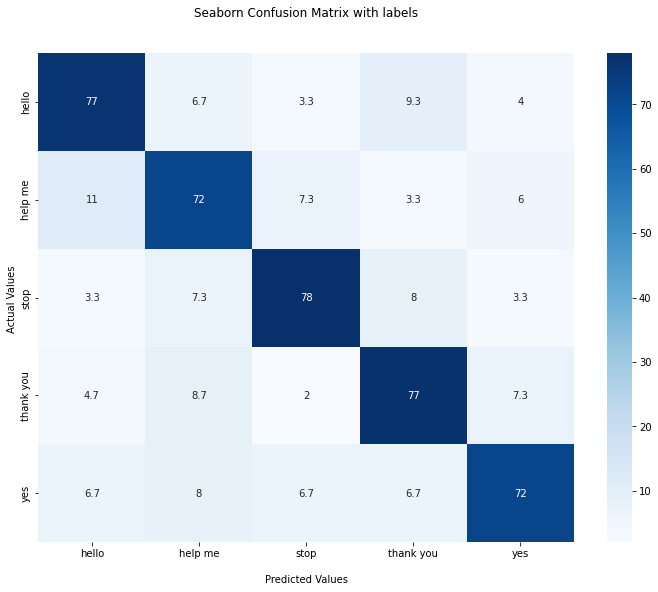

In [202]:
from matplotlib import pyplot as plt
import seaborn as sns
cf_matrix = cm*100/150
plt.figure(figsize=(12, 9))
ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['hello', 'help me', 'stop', 'thank you', 'yes'])
ax.yaxis.set_ticklabels(['hello', 'help me', 'stop', 'thank you', 'yes'])

## Display the visualization of the Confusion Matrix.

plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()
plt.close()

In [249]:
paper_1 = ["FC5", "CP5", "F5", "FT7", "FC3", "TP7", "CP3", "P5"]
# 1) Inferring imagined speech using EEG signals a new approach using Riemannian manifold features
# 2) Multiclass Classification of Word Imagination Speech With Hybrid Connectivity Features

In [250]:
channel_index = []
for idx, i in enumerate(channels_names):
    if i in paper_1:
        channel_index.append(idx)
    else:
        pass

In [251]:
def paper_channels_impl(channel_index, train, y_train, test, y_test):
#     tempfeatures, vtemp = np.array()
    
    total_feature = train.shape[1]
    feature_per_channel = total_feature//64
    induces = []
    for induce in channel_index:
        induce = induce*feature_per_channel
        induces.extend([induce+i for i in range(feature_per_channel)])
    return train[:,induces], test[:,induces]

In [252]:
# Spect

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_spect, y_train,  x_test_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Spect Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Statistical

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat, y_train,  x_test_stat, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Stat Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))



train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_temp, y_train,  x_test_temp, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Temp Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))


# Spect Stat

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat_spect, y_train,  x_test_stat_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Spect Stat Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Stat Temp

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat_temp, y_train,  x_test_stat_temp, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Stat Temp Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Temp Spect

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_temp_spect, y_train,  x_test_temp_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Temp Spect Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# All Stat, spect, Temp

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_all_features, y_train,  x_test_all_features, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" All Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

 Spect Accuracy: 0.26

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.29      0.28      0.29       150
           1       0.24      0.22      0.23       150
           2       0.27      0.27      0.27       150
           3       0.28      0.31      0.29       150
           4       0.22      0.22      0.22       150

   micro avg       0.26      0.26      0.26       750
   macro avg       0.26      0.26      0.26       750
weighted avg       0.26      0.26      0.26       750
 samples avg       0.26      0.26      0.26       750

 Stat Accuracy: 0.39866666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.34      0.35      0.34       150
           1       0.40      0.39      0.39       150
           2       0.40      0.38      0.39       150
           3       0.41      0.43      0.42       150
           4       0.46   

In [238]:
paper_2 = ["T7", "C5","C3", "C1", "CP5", "FC1", "FC3", "FC5", "FC6", "FT7", "F1", "F3", "F5", "F7", "FT8", "TP7"]
# EEG signal classification of imagined speech based on Riemannian distance of correntropy spectral density

In [240]:
channel_index = []
for idx, i in enumerate(channels_names):
    if i in paper_2:
        channel_index.append(idx)
    else:
        pass
channel_index

[2, 3, 7, 8, 10, 11, 12, 17, 36, 37, 41, 42, 44, 46, 47, 50]

In [243]:
# Spect

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_spect, y_train,  x_test_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Spect Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Statistical

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat, y_train,  x_test_stat, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Stat Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))



train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_temp, y_train,  x_test_temp, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Temp Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))


# Spect Stat

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat_spect, y_train,  x_test_stat_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Spect Stat Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Stat Temp

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat_temp, y_train,  x_test_stat_temp, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Stat Temp Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Temp Spect

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_temp_spect, y_train,  x_test_temp_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Temp Spect Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# All Stat, spect, Temp

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_all_features, y_train,  x_test_all_features, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" All Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

 Spect Accuracy: 0.33066666666666666

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.30      0.27      0.29       150
           1       0.30      0.32      0.31       150
           2       0.30      0.27      0.28       150
           3       0.35      0.38      0.36       150
           4       0.40      0.41      0.41       150

   micro avg       0.33      0.33      0.33       750
   macro avg       0.33      0.33      0.33       750
weighted avg       0.33      0.33      0.33       750
 samples avg       0.33      0.33      0.33       750

 Stat Accuracy: 0.4666666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       150
           1       0.47      0.47      0.47       150
           2       0.51      0.47      0.49       150
           3       0.41      0.47      0.44       150
           4

In [244]:
paper_3 = ["T7", "T8", "TP9", "TP10", "F3", "F4", "F7","F8", "FC1","FC2","FC5","Fp1", "Fp2", "FT9", "FT10", "Fz"]
len(paper_3)
# Continuous Silent Speech Recognition using EEG

16

In [245]:
channel_index = []
for idx, i in enumerate(channels_names):
    if i in paper_3:
        channel_index.append(idx)
    else:
        pass
channel_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 21, 40, 45]

In [247]:
# Spect

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_spect, y_train,  x_test_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Spect Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Statistical

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat, y_train,  x_test_stat, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Stat Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))



train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_temp, y_train,  x_test_temp, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Temp Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))


# Spect Stat

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat_spect, y_train,  x_test_stat_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Spect Stat Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Stat Temp

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_stat_temp, y_train,  x_test_stat_temp, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Stat Temp Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# Temp Spect

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_temp_spect, y_train,  x_test_temp_spect, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" Temp Spect Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

# All Stat, spect, Temp

train_temp_s, test_temp_s = paper_channels_impl(channel_index, x_train_all_features, y_train,  x_test_all_features, y_test)
kclf = KNeighborsClassifier(n_neighbors=1)
kclf.fit(train_temp_s, y_train)
y_pred = kclf.predict(test_temp_s)
print(" All Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

 Spect Accuracy: 0.3506666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.31      0.33      0.32       150
           1       0.35      0.32      0.33       150
           2       0.36      0.39      0.37       150
           3       0.39      0.33      0.36       150
           4       0.35      0.38      0.36       150

   micro avg       0.35      0.35      0.35       750
   macro avg       0.35      0.35      0.35       750
weighted avg       0.35      0.35      0.35       750
 samples avg       0.35      0.35      0.35       750

 Stat Accuracy: 0.4826666666666667

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.47      0.52      0.50       150
           1       0.48      0.48      0.48       150
           2       0.50      0.49      0.49       150
           3       0.47      0.45      0.46       150
           4 